**WEB SCRAPING PROJECT**

Analyze data from Flipkart regarding price, brands, rating, RAM, ROM of top 5 moble phone brands

In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [4]:
page_link='https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&param=7564&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ'
respond=requests.get(page_link)
respond.status_code

200

In [5]:
def scrape_the_data(url):
    respond=requests.get(url)
    if respond.status_code !=200:
        raise Exception('page load to fail {}'.format(url))
    doc=BeautifulSoup(respond.text,'html.parser')
    return doc
doc_scrape=scrape_the_data(page_link)
def scrape_the_mobile_brand(doc_scrape):
    class_='_4rR01T'
    scrap_mobile=doc_scrape.find_all('div',{'class':class_})
    mobile_brand=[]
    for mobile in scrap_mobile:
        mobile_brand.append(mobile.text)
    return mobile_brand
def scrape_model_ram(doc_scrape):
    mobile_ram_and_row=doc_scrape.find_all('ul',{'class':'_1xgFaf'})
    ram_and_row=[]
    for ram_row in mobile_ram_and_row:
        ram_and_row.append(ram_row.text)
    return ram_and_row
def scrape_rating_mobile(doc_scrape):
    mobile_rating=[]
    rating=doc_scrape.find_all('div',{'class':'_3LWZlK'})
    for all_phone_rating in rating:
        mobile_rating.append(all_phone_rating.text)
    return mobile_rating
def scrape_mobile_price(doc_scrape):
    mobile_price=doc_scrape.find_all('div',{'class':'_30jeq3 _1_WHN1'})
    price=[]
    for price_of_mobile in mobile_price:
        price.append(price_of_mobile.text)
    return price
    

In [6]:
print(len(scrape_the_mobile_brand(doc_scrape)))
print(len(scrape_model_ram(doc_scrape)))
print(len(scrape_rating_mobile(doc_scrape)))
print(len(scrape_mobile_price(doc_scrape)))

24
24
24
24


In [7]:
def scrape_the_entire_data(url):
  respond=requests.get(url)
  if respond.status_code !=200:
    raise Exception('failed to load the page {}'.format(url))
  doc=BeautifulSoup(respond.text,'html.parser')
  all_information_about_phone={
      'Mobile_Model':scrape_the_mobile_brand(doc_scrape),
      'Prices':scrape_mobile_price(doc_scrape),
      'Mobile_Model':scrape_rating_mobile(doc_scrape),
      'RAM_ROM':scrape_model_ram(doc_scrape),      
  }
  return pd.DataFrame(all_information_about_phone)
data=scrape_the_entire_data(page_link)
data

,Mobile_Model,Prices,RAM_ROM
0,4.4,"₹10,999",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....
1,4.4,"₹10,999",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....
2,4.4,"₹10,999",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....
3,4.4,"₹11,999",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...
4,4.3,"₹6,499",2 GB RAM | 32 GB ROM | Expandable Upto 512 GB1...
5,4.3,"₹6,499",2 GB RAM | 32 GB ROM | Expandable Upto 512 GB1...
6,4.3,"₹9,999",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB17....
7,4.2,"₹12,999",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
8,4.4,"₹5,999",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...
9,4.3,"₹9,999",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB17....


In [8]:
data.to_csv('Googl pixel.csv',index=False)

In [9]:
def realme_mobile_scrape():
    page_url='https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3Drealme&p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&param=7564&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&otracker=clp_metro_expandable_1_5.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_Q1PDG4YW86MF_wp2&fm=neo%2Fmerchandising&iid=M_613df34d-5b30-4ff4-b61b-23cab121b2be_5.Q1PDG4YW86MF&ppt=None&ppn=None&ssid=ysbf1np0280000001682747411685'
    respond=requests.get(page_url)
    if respond.status_code !=200:
        raise Exception('faild to load the page {}'.format(page_url))
    doc=BeautifulSoup(respond.text,'html.parser')
    return doc
html_code=realme_mobile_scrape()

In [20]:
print(len(mobile_brand))
print(len(prices))
print(len(ratings))
print(len(ram_and_row))

24
24
24
24


In [11]:
pages=13
for i in range(1,pages+1):
    page_link=f'https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3DVivo&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlZJVk8iXSwidmFsdWVUeXBlIjoiTVVMVElfVkFMVUVEIn19fX19&otracker=clp_metro_expandable_5_5.metroExpandable.METRO_EXPANDABLE_VIVO_mobile-phones-store_3Z3SLACO8AXE_wp2&fm=neo%2Fmerchandising&iid=M_bd72e8e7-f680-49af-a421-07a56b8eec94_5.3Z3SLACO8AXE&ppt=browse&ppn=browse&ssid=xgmm6d74xc0000001682751752690&page={i}'
    respond=requests.get(page_link)
    web_page=BeautifulSoup(respond.text,'html.parser')
    ratings=[]
    realme_rating=web_page.find_all('div',{'class':'_3LWZlK'})
    for mobile_rating in realme_rating:
        ratings.append(mobile_rating.text)

In [12]:
len(ratings)

2

In [29]:
page=6
for i in range(1,page + 1):
    pages_url=f'https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3DPOCO&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&otracker=clp_metro_expandable_2_5.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_O1WYX08RHODP_wp2&fm=neo%2Fmerchandising&iid=M_ce62148f-4355-4ffd-8dc7-e45de3ef0718_5.O1WYX08RHODP&ppt=browse&ppn=browse&page={i}'
    mobile_brand=[]
    respond=requests.get(pages_url)
    web_page=BeautifulSoup(respond.text,'html.parser')
    mobile_brand_realme=web_page.find_all('div',{'class':'_4rR01T'})
    for mobile in mobile_brand_realme:
        mobile_brand.append(mobile.text)
    prices=[]
    realme_price=web_page.find_all('div',{'class':'_30jeq3'})
    for price in realme_price:
        prices.append(price.text)
    ratings=[]
    realme_rating=web_page.find_all('div',{'class':'_3LWZlK'})
    for mobile_rating in realme_rating:
        ratings.append(mobile_rating.text)
    ram_and_row=[]
    realme_ram_and_row=web_page.find_all('ul',{'class':'_1xgFaf'})
    for ram_row in realme_ram_and_row:
        ram_and_row.append(ram_row.text)
        
    all_realme_mobile_information={
    'Mobile_Model':mobile_brand,
    'Prices':prices,
    'Rating':ratings,
    'RAM_ROM':ram_and_row
      }
#covert to the dataframe
poco=pd.DataFrame(all_realme_mobile_information)
poco

,Mobile_Model,Prices,Rating,RAM_ROM
0,"POCO M3 (Cool Blue, 128 GB)","₹14,999",4.3,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
1,"POCO X2 (Matrix Purple, 256 GB)","₹20,999",4.5,8 GB RAM | 256 GB ROM | Expandable Upto 512 GB...
2,"POCO M2 Pro (Green and Greener, 64 GB)","₹16,999",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
3,"POCO X2 (Atlantis Blue, 128 GB)","₹18,999",4.5,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
4,"POCO X2 (Phoenix Red, 64 GB)","₹15,999",4.5,6 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
5,"POCO M2 (Brick Red, 64 GB)","₹12,949",4.4,6 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
6,"POCO M2 Pro (Two Shades of Black, 64 GB)","₹16,999",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
7,"POCO F1 (Graphite Black, 128 GB)","₹24,999",4.5,6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
8,"POCO F3 GT 5G (Gunmetal Silver, 128 GB)","₹32,999",4.3,6 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Full...
9,"POCO M2 Pro (Out of the Blue, 64 GB)","₹16,999",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...


In [22]:
poco.to_csv('poco.csv',index=True)

In [23]:
page=5
for i in range(1,page + 1):
    pages_url=f'https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3DOPPO&p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&otracker=clp_metro_expandable_4_5.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_YN2R24UWDDQ8_wp2&fm=neo%2Fmerchandising&iid=M_666daf6b-ff1c-407e-889d-fb17f2bb837f_5.YN2R24UWDDQ8&ppt=browse&ppn=browse&ssid=06jtchnklc0000001682751391582&page={i}'
    mobile_brand=[]
    respond=requests.get(pages_url)
    web_page=BeautifulSoup(respond.text,'html.parser')
    mobile_brand_realme=web_page.find_all('div',{'class':'_4rR01T'})
    for mobile in mobile_brand_realme:
        mobile_brand.append(mobile.text)
    prices=[]
    realme_price=web_page.find_all('div',{'class':'_30jeq3'})
    for price in realme_price:
        prices.append(price.text)
    ratings=[]
    realme_rating=web_page.find_all('div',{'class':'_3LWZlK'})
    for mobile_rating in realme_rating:
        ratings.append(mobile_rating.text)
    ram_and_row=[]
    realme_ram_and_row=web_page.find_all('ul',{'class':'_1xgFaf'})
    for ram_row in realme_ram_and_row:
        ram_and_row.append(ram_row.text)
        
    all_realme_mobile_information={
    'Mobile_Model':mobile_brand,
    'Prices':prices,
    'Rating':ratings,
    'RAM_ROM':ram_and_row
      }
#covert to the dataframe
oppo=pd.DataFrame(all_realme_mobile_information)
oppo

,Mobile_Model,Prices,Rating,RAM_ROM
0,"OPPO A96 (Starry Black, 128 GB)","₹17,999",4.3,8 GB RAM | 128 GB ROM16.74 cm (6.59 inch) Full...
1,"OPPO F21 Pro 5G (Rainbow Spectrum, 128 GB)","₹25,999",4.2,8 GB RAM | 128 GB ROM16.33 cm (6.43 inch) Disp...
2,"OPPO A12 (Deep Blue, 64 GB)","₹10,990",4.4,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...
3,"OPPO F19 Pro+ 5G (Fluid Black, 128 GB)","₹19,990",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
4,"OPPO A16 (Royal Gold, 64 GB)","₹12,990",4.3,4 GB RAM | 64 GB ROM16.56 cm (6.52 inch) HD+ D...
5,"OPPO A54 (Starry Blue, 128 GB)","₹14,776",4.3,6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
6,"OPPO A16 (Crystal Black, 64 GB)","₹12,990",4.3,4 GB RAM | 64 GB ROM16.56 cm (6.52 inch) HD+ D...
7,"OPPO A54 (Crystal Black, 128 GB)","₹13,250",4.3,6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
8,"OPPO A12 (Deep Blue, 32 GB)","₹10,989",4.4,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...
9,"OPPO A53s 5G (Ink Black, 128 GB)","₹17,990",4.3,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...


In [24]:
oppo.to_csv('oppo.csv',index=True)

In [30]:
page=12
for i in range(1,page + 1):
    pages_url=f'https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3DVivo&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlZJVk8iXSwidmFsdWVUeXBlIjoiTVVMVElfVkFMVUVEIn19fX19&otracker=clp_metro_expandable_5_5.metroExpandable.METRO_EXPANDABLE_VIVO_mobile-phones-store_3Z3SLACO8AXE_wp2&fm=neo%2Fmerchandising&iid=M_bd72e8e7-f680-49af-a421-07a56b8eec94_5.3Z3SLACO8AXE&ppt=browse&ppn=browse&ssid=xgmm6d74xc0000001682751752690&page={i}'
    mobile_brand=[]
    respond=requests.get(pages_url)
    web_page=BeautifulSoup(respond.text,'html.parser')
    mobile_brand_realme=web_page.find_all('div',{'class':'_4rR01T'})
    for mobile in mobile_brand_realme:
        mobile_brand.append(mobile.text)
    prices=[]
    realme_price=web_page.find_all('div',{'class':'_30jeq3'})
    for price in realme_price:
        prices.append(price.text)
    ratings=[]
    realme_rating=web_page.find_all('div',{'class':'_3LWZlK'})
    for mobile_rating in realme_rating:
        ratings.append(mobile_rating.text)
    ram_and_row=[]
    realme_ram_and_row=web_page.find_all('ul',{'class':'_1xgFaf'})
    for ram_row in realme_ram_and_row:
        ram_and_row.append(ram_row.text)
        
    all_realme_mobile_information={
    'Mobile_Model':mobile_brand[:23],
    'Prices':prices[:23],
    'Rating':ratings,
    'RAM_ROM':ram_and_row[:23]
      }
#covert to the dataframe
vivo=pd.DataFrame(all_realme_mobile_information)
vivo

,Mobile_Model,Prices,Rating,RAM_ROM
0,"vivo V20 Pro (Sunset Melody, 128 GB)","₹34,990",4.4,8 GB RAM | 128 GB ROM16.36 cm (6.44 inch) Full...
1,"vivo X60 Pro (Midnight Black, 256 GB)","₹45,100",4.4,12 GB RAM | 256 GB ROM16.66 cm (6.56 inch) Ful...
2,"vivo Y75 5G (Glowing Galaxy, 128 GB)","₹21,990",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...
3,"vivo Y12 (Aqua Blue, 64 GB)","₹12,990",4.4,3 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...
4,"vivo X70 Pro (Aurora Dawn, 256 GB)","₹52,990",4.4,12 GB RAM | 256 GB ROM16.66 cm (6.56 inch) Ful...
5,"vivo X70 Pro (Cosmic Black, 256 GB)","₹52,990",4.4,12 GB RAM | 256 GB ROM16.66 cm (6.56 inch) Ful...
6,"vivo X70 Pro (Aurora Dawn, 128 GB)","₹46,990",4.5,8 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Full...
7,"vivo S1 Pro (Jazzy Blue, 128 GB)","₹18,990",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
8,"vivo S1 Pro (Dreamy White, 128 GB)","₹18,990",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...
9,"vivo S1 Pro (Mystic Black, 128 GB)","₹18,950",4.4,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...


In [31]:
vivo.to_csv('vivo.csv',index=True)

In [33]:
page=16
for i in range(1,page + 1):
    pages_url=f'https://www.flipkart.com/mobiles/mi~brand/pr?sid=tyy%2C4io&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&otracker=clp_metro_expandable_7_5.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_OUJ0NDXWZCCJ_wp2&fm=neo%2Fmerchandising&iid=M_5530f5fb-400f-4351-951b-a74c25b09fcd_5.OUJ0NDXWZCCJ&ppt=browse&ppn=browse&ssid=bnhf0wor340000001682752199809&page={i}'
    mobile_brand=[]
    respond=requests.get(pages_url)
    web_page=BeautifulSoup(respond.text,'html.parser')
    mobile_brand_realme=web_page.find_all('div',{'class':'_4rR01T'})
    for mobile in mobile_brand_realme:
        mobile_brand.append(mobile.text)
    prices=[]
    realme_price=web_page.find_all('div',{'class':'_30jeq3'})
    for price in realme_price:
        prices.append(price.text)
    ratings=[]
    realme_rating=web_page.find_all('div',{'class':'_3LWZlK'})
    for mobile_rating in realme_rating:
        ratings.append(mobile_rating.text)
    ram_and_row=[]
    realme_ram_and_row=web_page.find_all('ul',{'class':'_1xgFaf'})
    for ram_row in realme_ram_and_row:
        ram_and_row.append(ram_row.text)

    all_realme_mobile_information={
    'Mobile_Model':mobile_brand,
    'Prices':prices[:24],
    'Rating':ratings[:24],
    'RAM_ROM':ram_and_row
      }
    #covert to the dataframe
mi=pd.DataFrame(all_realme_mobile_information)
mi

,Mobile_Model,Prices,Rating,RAM_ROM
0,"11 Lite NE (Jazz Blue, 128 GB)","₹22,890",4,8 GB RAM | 128 GB ROM16.64 cm (6.55 inch) Disp...
1,"Mi 11X Pro 5G (Cosmic Black, 256 GB)","₹31,990",4,8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Full...
2,"Redmi Note 9 Pro (Glacier White, 128 GB)","₹13,990",4.3,4 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
3,"Redmi 5 (Black, 64 GB)","₹11,990",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 128 GB1...
4,"Redmi Note 9 Pro (Interstellar Black, 128 GB)","₹17,399",4.3,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
5,"Redmi Note 9 Pro (Aurora Blue, 128 GB)","₹17,998",4.3,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
6,"Redmi Note 9 Pro (Interstellar Black, 64 GB)","₹14,450",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...
7,"Redmi Note 9 Pro (Champagne Gold, 128 GB)","₹14,640",4.3,4 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
8,"Redmi Note 9 Pro (Aurora Blue, 128 GB)","₹13,990",4.3,4 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
9,"Redmi Y1 lite (Grey, 16 GB)","₹7,499",4.2,2 GB RAM | 16 GB ROM | Expandable Upto 128 GB1...


In [34]:
mi.to_csv('miphones.csv',index=True)

In [38]:
google=pd.read_csv('Googl pixel.csv')

poco=pd.read_csv('poco.csv')
vivo=pd.read_csv('vivo.csv')
oppo=pd.read_csv('oppo.csv')
mi=pd.read_csv('miphones.csv')

In [39]:
google.head(2)

,Mobile_Model,Prices,RAM_ROM
0,4.4,"₹10,999",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....
1,4.4,"₹10,999",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....


In [ ]:
realme.head(2)

In [41]:
final_df=pd.concat([google,vivo,oppo,mi,poco])
final_df=final_df.drop(['Unnamed: 0'],axis=1)
final_df.head()

,Mobile_Model,Prices,RAM_ROM,Rating
0,4.4,"₹10,999",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,NaN
1,4.4,"₹10,999",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,NaN
2,4.4,"₹10,999",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,NaN
3,4.4,"₹11,999",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,NaN
4,4.3,"₹6,499",2 GB RAM | 32 GB ROM | Expandable Upto 512 GB1...,NaN


In [42]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 23
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mobile_Model  119 non-null    object 
 1   Prices        119 non-null    object 
 2   RAM_ROM       119 non-null    object 
 3   Rating        95 non-null     float64
dtypes: float64(1), object(3)
memory usage: 4.6+ KB


In [43]:
final_df['Prices']=final_df['Prices'].str.replace('₹','')
final_df['Prices']=final_df['Prices'].str.replace(',','')
final_df['Prices']=final_df['Prices'].astype(int)

In [44]:
import re
final_df['RAM'] = final_df['RAM_ROM'].str.extract('(\d+\s?[Gg][Bb]\s)', flags=re.IGNORECASE)
final_df['ROM'] = final_df['RAM_ROM'].str.extract('(\d+\s?[Gg][Bb]\sROM)', flags=re.IGNORECASE)
final_df['ROM']=final_df['ROM'].str.replace('ROM','')

In [45]:
final_df.head(2)

,Mobile_Model,Prices,RAM_ROM,Rating,RAM,ROM
0,4.4,10999,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,NaN,4 GB,64 GB
1,4.4,10999,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,NaN,4 GB,64 GB


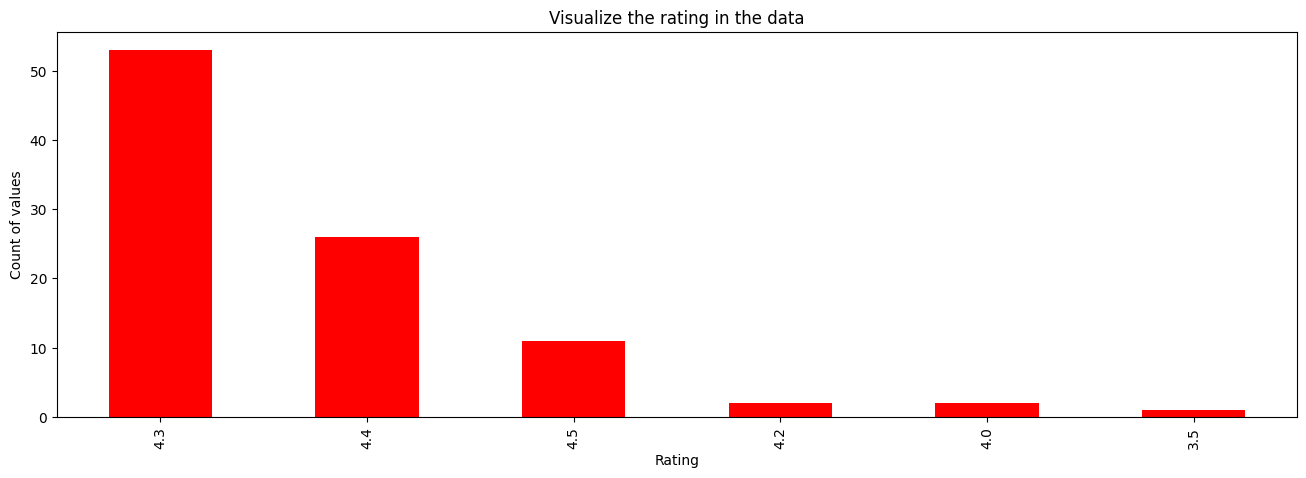

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
final_df['Rating'].value_counts().plot(kind='bar',title="Visualize the rating in the data",color='red',figsize=(16,5))
plt.xlabel("Rating")
plt.ylabel("Count of values")
plt.show()

In [47]:
final_df['Prices']=final_df['Prices'].astype(int)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 23
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mobile_Model  119 non-null    object 
 1   Prices        119 non-null    int64  
 2   RAM_ROM       119 non-null    object 
 3   Rating        95 non-null     float64
 4   RAM           118 non-null    object 
 5   ROM           118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.5+ KB


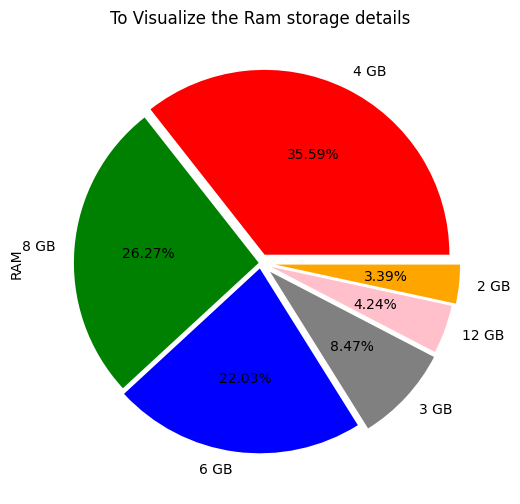

In [48]:
final_df['RAM'].value_counts().plot(kind='pie',explode=[0.05,0.01,0.03,0.07,0.06,0.08],
    labels=['4 GB','8 GB','6 GB','3 GB','12 GB','2 GB'],
    colors=['red','green','blue','gray','pink','orange'],
    autopct='%1.2f%%',title='To Visualize the Ram storage details',figsize=(14,6))
plt.show()

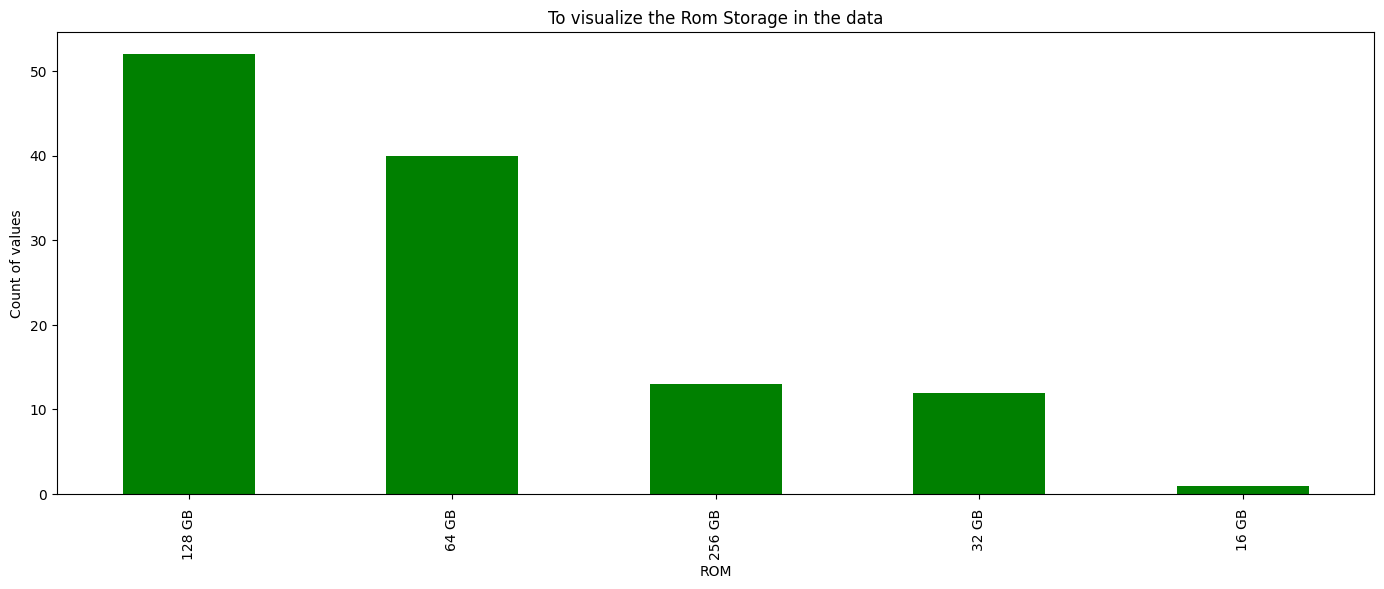

In [49]:
final_df['ROM'].value_counts().plot(kind='bar',color='g',title="To visualize the Rom Storage in the data",figsize=(17,6))
plt.xlabel("ROM")
plt.ylabel("Count of values")
plt.show()

<ipython-input-50-c818733803d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['Prices'],kde=True,bins=30,color='b')


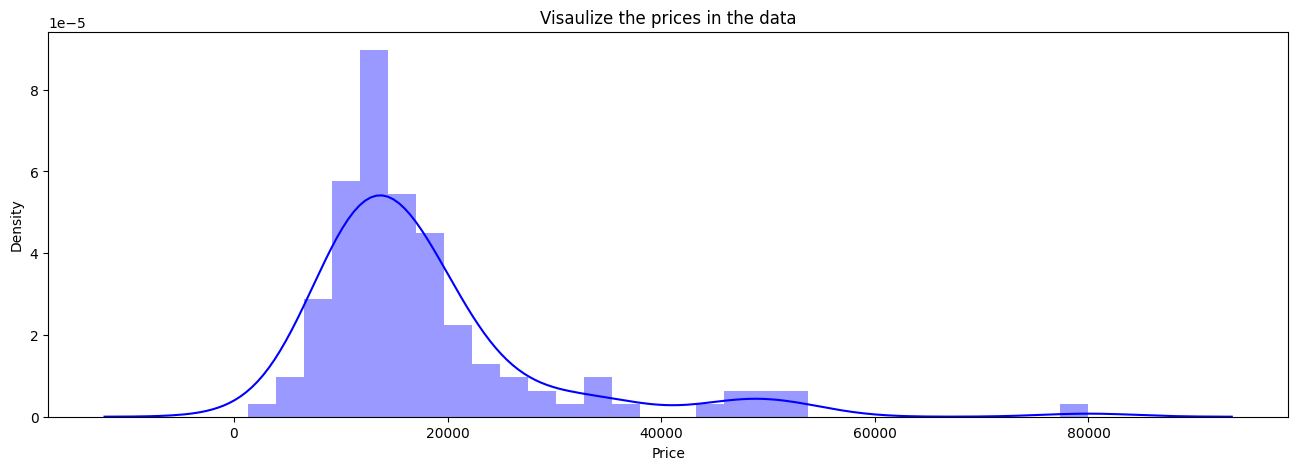

In [50]:
plt.figure(figsize=(16,5))
sns.distplot(final_df['Prices'],kde=True,bins=30,color='b')
plt.title("Visaulize the prices in the data")
plt.xlabel("Price")
plt.show()

In [51]:
final_df.columns

Index(['Mobile_Model', 'Prices', 'RAM_ROM', 'Rating', 'RAM', 'ROM'], dtype='object')

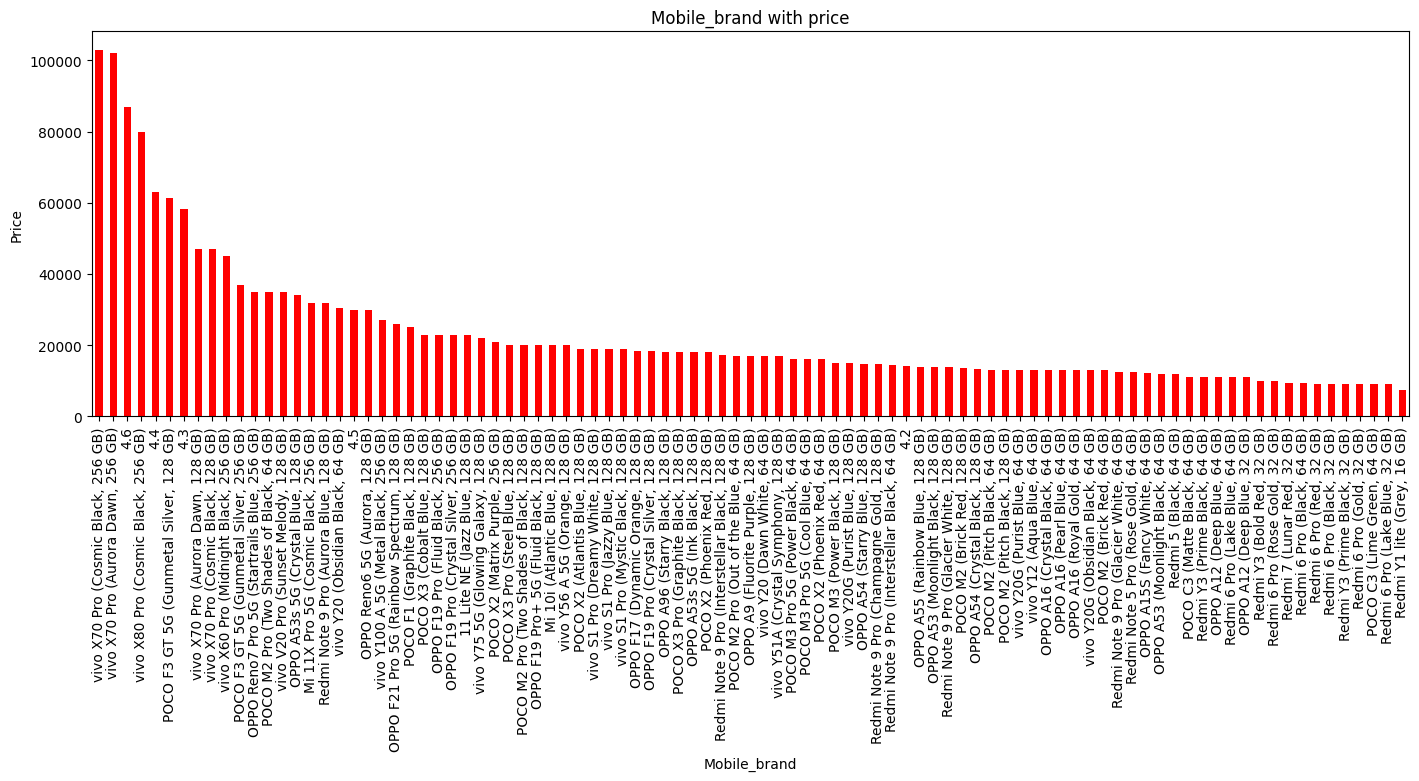

In [52]:
final_df.groupby(['Mobile_Model'])['Prices'].sum()\
.sort_values(ascending=False)\
.plot(kind='bar',figsize=(17,5),color='r',title="Mobile_brand with price")
plt.xlabel("Mobile_brand")
plt.ylabel("Price")
plt.show()

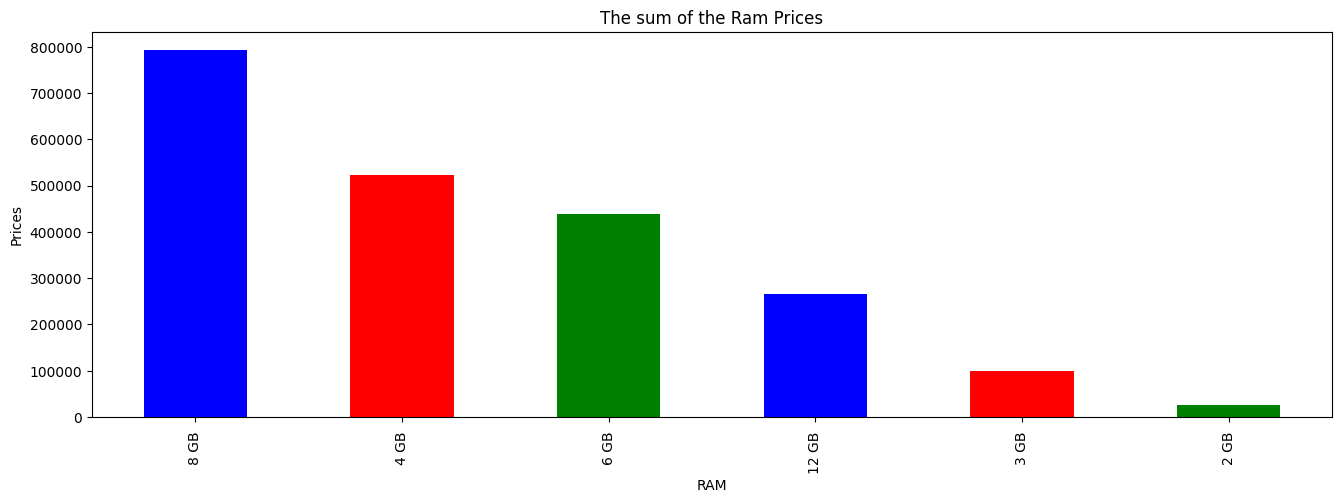

In [53]:
#To calculate the sum of the ram prices in the data
final_df.groupby(['RAM'])['Prices'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(16,5),title="The sum of the Ram Prices",color=['blue','red','green'])
plt.xlabel("RAM")
plt.ylabel("Prices")
plt.show()

In [54]:
print(len(mobile_brand))
print(len(prices))
print(len(ratings))
print(len(ram_and_row))

24
24
24
24


In [55]:
vivo.to_csv('vivo.csv')

In [56]:
#checking the length
len(respond.text)
web_page=respond.text
type(web_page)

str

In [57]:
doc=BeautifulSoup(web_page,'html.parser')
google_pixel=doc.find_all('div',{'class':'_4rR01T'})
ram_and_row=doc.find_all('ul',{'class':'_1xgFaf'})
rating=doc.find_all('div',{'class':'_3LWZlK'})
a=rating[0].text.strip()

In [58]:
ram_and_row[0].text.strip()

'6 GB RAM | 128 GB ROM | Expandable Upto 256 GB16.51 cm (6.5 inch) Full HD+ Display64MP + 8MP + 2MP + 2MP | 16MP Front Camera4300 mAh BatteryMediaTek Helio G90T Processor90 Hz Ultra Smooth Display30 W Flash ChargeSide Fingerprint SensorBrand Warranty of 1 Year Available for Mobile Including Battery and 6 Months for Accessories'

In [59]:
print(len(google_pixel))
print(len(ram_and_row))
print(len(rating))

24
24
24


In [70]:
print(len(mobile))
print(len(ram))
print(len(brand_rating))

24
6
24


In [61]:
mobile=[]
for brand in google_pixel:
    mobile.append(brand.text)
ram=[]
for ram_row in ram_and_row:
    ram.append(ram_row.text)
brand_rating=[]
for mobile_rating in rating:
    brand_rating.append(mobile_rating.text)
mobile_price=doc.find_all('div',{'class':'_30jeq3 _1_WHN1'})
price=[]
for price_of_mobile in mobile_price:
    price.append(price_of_mobile.text)
mobile_reviews={
    'brand':mobile,
    'Ram_ROM':ram,
    'Rating':brand_rating,
    'price':price
}
pd.DataFrame(mobile_reviews)

,brand,Ram_ROM,Rating,price
0,"realme 6 (Comet Blue, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...,4.4,"₹15,999"
1,"realme C3 (Frozen Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.4,"₹8,999"
2,"realme C3 (Blazing Red, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.4,"₹8,999"
3,"realme C3 (Frozen Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,4.4,"₹7,999"
4,"realme 7 Pro (Mirror Silver, 128 GB)",8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...,4.4,"₹21,999"
5,"realme C2 (Diamond Blue, 16 GB)",2 GB RAM | 16 GB ROM | Expandable Upto 256 GB1...,4.4,"₹6,999"
6,"realme 9 Pro 5G (Aurora Green, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 256 GB...,4.4,"₹18,999"
7,"realme 2 (Diamond Black, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,4.5,"₹9,290"
8,"realme C15 Qualcomm Edition (Power Silver, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,4.3,"₹11,999"
9,"realme 2 Pro (Black Sea, 128 GB)",8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...,4.5,"₹17,990"


In [62]:
mobile=[]
ram_row=[]
mobile_rating=[]
mobile_brands=doc.find_all('div',{'class':'_4rR01T'})
ram_and_row=doc.find_all('ul',{'class':'_1xgFaf'})
rating=doc.find_all('div',{'class':'_3LWZlK'})
for brands in mobile_brands:
    mobile.append(brands.text)
for ram in ram_and_row:
    ram_row.append(ram.text)
for rating_mobile in rating:
    mobile_rating.append(rating_mobile.text)
ram_row
# mobile_reviews={
#     'brand':mobile[],
#     'Ram_ROM':ram_row[],
#     'Rating':mobile_rating[]
# }
# pd.DataFrame(mobile_reviews)

['6 GB RAM | 128 GB ROM | Expandable Upto 256 GB16.51 cm (6.5 inch) Full HD+ Display64MP + 8MP + 2MP + 2MP | 16MP Front Camera4300 mAh BatteryMediaTek Helio G90T Processor90 Hz Ultra Smooth Display30 W Flash ChargeSide Fingerprint SensorBrand Warranty of 1 Year Available for Mobile Including Battery and 6 Months for Accessories',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB16.56 cm (6.52 inch) HD+ Display12MP + 2MP | 5MP Front Camera5000 mAh BatteryHelio G70 ProcessorBrand Warranty of 1 Year Available for Mobile and 6 Months for Accessories',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB16.56 cm (6.52 inch) HD+ Display12MP + 2MP | 5MP Front Camera5000 mAh BatteryHelio G70 ProcessorBrand Warranty of 1 Year Available for Mobile and 6 Months for Accessories',
 '3 GB RAM | 32 GB ROM | Expandable Upto 256 GB16.56 cm (6.52 inch) HD+ Display12MP + 2MP | 5MP Front Camera5000 mAh BatteryHelio G70 ProcessorBrand Warranty of 1 Year Available for Mobile and 6 Months for Accessories',
 '8 GB R

In [63]:
def get_html_code():
    url='https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&param=7564&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&fm=neo%2Fmerchandising&iid=M_b49965b5-ad80-4493-88b1-7a1828555879_3.Q1PDG4YW86MF&ppt=hp&ppn=homepage&ssid=paxle4idvk0000001669033731730&p%5B%5D=facets.brand%255B%255D%3DGoogle&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIkdPT0dMRSJdLCJ2YWx1ZVR5cGUiOiJNVUxUSV9WQUxVRUQifX19fX0%3D&otracker=clp_metro_expandable_3_5.metroExpandable.METRO_EXPANDABLE_GOOGLE_mobile-phones-store_0TAYGN3KGJ9F_wp2&fm=neo%2Fmerchandising&iid=M_a0b0699e-a3bd-4b06-9f82-1602b6c1c272_5.0TAYGN3KGJ9F&ppt=hp&ppn=homepage&ssid=elvw4je0g00000001682670326142'
    respond=requests.get(url)
    if respond.status_code !=200:
        raise Exception ('failed to load the page{}'.format(url))
    doc=BeautifulSoup(url,'html.parser')
    return doc
doc=get_html_code()

In [65]:
def mobile_models(doc):
    google_pixel=doc.find_all('div',{'class':'_4rR01T'})
    mobile_model=[]
    for mobile in google_pixel:
        mobile_model.append(mobile.text)
        return mobile_model
def ram_and_row(doc):
    ram_and_row=doc.find_all('ul',{'class':'_1xgFaf'})
    ram_and_row=[]
    for ram_row in ram_and_row:
        ram_and_row.append(ram_row.text)
        return ram_and_row
def mobile_rating(doc):
    mobile_rating=[]
    rating=doc.find_all('div',{'class':'_3LWZlK'})
    for all_phone_rating in rating:
        mobile_rating.append(all_phone_rating.text)
        return mobile_rating

In [69]:
mobile_models(doc)

In [67]:
def scrap_the_data():
    page_link='https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&param=7564&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&fm=neo%2Fmerchandising&iid=M_b49965b5-ad80-4493-88b1-7a1828555879_3.Q1PDG4YW86MF&ppt=hp&ppn=homepage&ssid=paxle4idvk0000001669033731730&p%5B%5D=facets.brand%255B%255D%3DGoogle&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIkdPT0dMRSJdLCJ2YWx1ZVR5cGUiOiJNVUxUSV9WQUxVRUQifX19fX0%3D&otracker=clp_metro_expandable_3_5.metroExpandable.METRO_EXPANDABLE_GOOGLE_mobile-phones-store_0TAYGN3KGJ9F_wp2&fm=neo%2Fmerchandising&iid=M_a0b0699e-a3bd-4b06-9f82-1602b6c1c272_5.0TAYGN3KGJ9F&ppt=hp&ppn=homepage&ssid=elvw4je0g00000001682670326142'
    respond = requests.get(page_link)
    if respond.status_code != 200:
        raise Exception('failed to load the {}'.format(respond))
    doc = BeautifulSoup(respond.text, 'html.parser')
    mobile_brands = {
        'mobile_brand': mobile_models(doc),
        'RAM_ROM': ram_and_row(doc),
        'Rating': mobile_rating(doc)
    }
    return pd.DataFrame(mobile_brands)

In [68]:
scrap_the_data()

,mobile_brand,RAM_ROM,Rating
0,"Google Pixel 6a (Charcoal, 128 GB)",None,4.3
